In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data Glacier internship/Group_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('Train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train_df.shape

(13647309, 48)

In [ ]:
train_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
train_df.isnull().sum() / train_df.shape[0] *100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

let's delete rows with a lot of missing values

In [ ]:
del_rows = train_df[train_df.ind_empleado.isnull()].index 

In [ ]:
train_df = train_df.drop(del_rows, axis = 0)

let's delete not-informative columns:

  

*   **ult_fec_cli_1t** and **conyuemp** have 99% null values. According to the instructions  conyuemp feature should contain number 1 if the customer is spouse of an employee. In dataset the feature conyuemp contain (N, S, nan) values. I suppose that N=No, S = Si (Yes). The number of clients with value ‘S’ = 17. We can delete these features because they contain too small info for analysis.
*   the feature **tipodom** we can delete because only 1 row has missing value and other rows have the same value
*   features **cod_prov** and **nomprov** explain the same information. We can delete one of them



In [ ]:
train_df.drop(['ult_fec_cli_1t', 'conyuemp', 'tipodom', 'cod_prov'], axis=1, inplace=True)

# Cleaning and transforming data

cleaning and transforming the features **age** and **antiguedad**

In [ ]:
#change type from object to int

train_df['age'] = train_df['age'].astype(int) 
train_df['antiguedad'] = train_df['antiguedad'].astype(int)

In [ ]:
num_columns = ['age', 'antiguedad', 'renta']

In [ ]:
train_df[num_columns].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,age,antiguedad,renta
count,13619575,13619575,10852934
mean,40,77,134254
std,17,1672,230620
min,2,-999999,1203
25%,24,23,68711
50%,39,50,101850
75%,50,135,155956
max,164,256,28894396


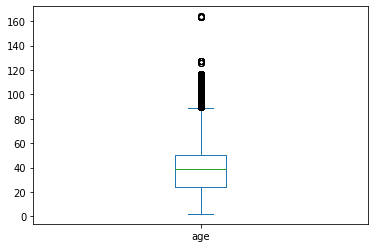

In [ ]:
_, bp = train_df.age.plot.box(return_type='both')

(array([1.494600e+04, 4.160800e+04, 7.323100e+04, 2.636650e+06,
        2.076752e+06, 1.074322e+06, 1.086930e+06, 1.878547e+06,
        1.344313e+06, 9.843010e+05, 7.810910e+05, 4.461980e+05,
        4.384800e+05, 2.723290e+05, 1.773510e+05, 1.600600e+05,
        7.627000e+04, 4.027700e+04, 1.140400e+04, 3.494000e+03,
        9.220000e+02, 7.700000e+01, 3.000000e+00, 8.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.100000e+01]),
 array([  2. ,   7.4,  12.8,  18.2,  23.6,  29. ,  34.4,  39.8,  45.2,
         50.6,  56. ,  61.4,  66.8,  72.2,  77.6,  83. ,  88.4,  93.8,
         99.2, 104.6, 110. , 115.4, 120.8, 126.2, 131.6, 137. , 142.4,
        147.8, 153.2, 158.6, 164. ]),
 <a list of 30 Patch objects>)

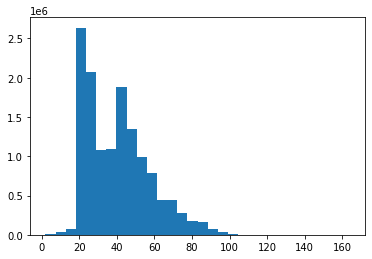

In [ ]:
plt.hist(train_df.age, bins = 30)

The feature **age** has some rows with customers  who are older than 100 years and a few customers who are very young. I think there are a lot of incorrect data. We can see that customers who are older 20 and younger 90  are most. One of the ways to overcome outliers is to unite the youngest and most adult customers into groups.


In [ ]:
train_df['age'] = np.where(train_df['age'] < 20, 19, train_df['age'])
train_df['age'] = np.where(train_df['age'] > 90, 91, train_df['age'])

result after grouping:

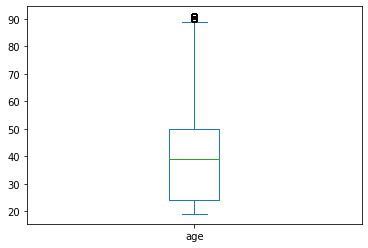

In [ ]:
_, bp = train_df.age.plot.box(return_type='both')

(array([1250237., 1516198., 1554579.,  522173.,  391749.,  507999.,
         358151.,  642805.,  548302.,  628764.,  962029.,  585870.,
         758443.,  434908.,  384038.,  461340.,  258916.,  327376.,
         178919.,  166093.,  233799.,  137017.,  191181.,   99594.,
          83576.,  109055.,   65798.,   82834.,   45366.,  132466.]),
 array([19. , 21.4, 23.8, 26.2, 28.6, 31. , 33.4, 35.8, 38.2, 40.6, 43. ,
        45.4, 47.8, 50.2, 52.6, 55. , 57.4, 59.8, 62.2, 64.6, 67. , 69.4,
        71.8, 74.2, 76.6, 79. , 81.4, 83.8, 86.2, 88.6, 91. ]),
 <a list of 30 Patch objects>)

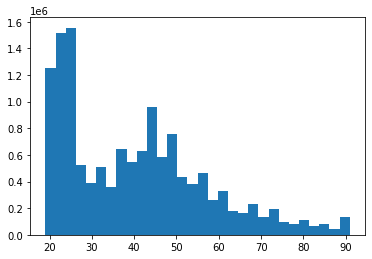

In [ ]:
plt.hist(train_df.age, bins = 30)

The feature 'antiguedad' (Customer seniority (in months)) contains 38 rows with value -99999. It makes the data very skewed. We should delete rows with this value, because it is an unknown value:


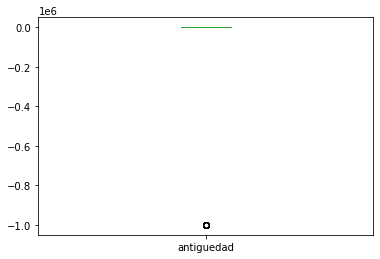

In [ ]:
_, bp = train_df.antiguedad.plot.box(return_type='both')

In [ ]:
unkn_rows = train_df[train_df.antiguedad == -999999].index
train_df = train_df.drop(unkn_rows, axis = 0)

box plot after deleting

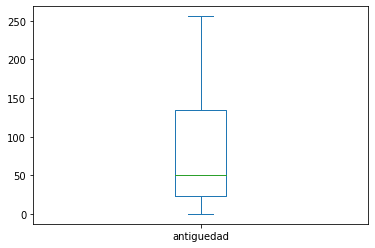

In [ ]:
_, bp = train_df.antiguedad.plot.box(return_type='both')

The feature Renta is also very shifted, because there is 18,9% data much more than 75% quartile.


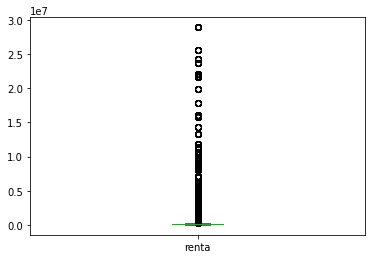

In [ ]:
_, bp = train_df.renta.plot.box(return_type='both')

Almost 19% of data are the outliers. And 20% of data is null. Delete these rows will be incorrect. It is necessary to carry out work on the replacement of zero values and emissions. For NA values it can be mean by segmento feature.
For outliers it will be grouping.
First of all let's fill missing values the mean values by feature **segmento** and **nomprov**.
before that let's input the most popular value in feature **nomprov** and **cod_prov**

In [ ]:
train_df.nomprov.value_counts().head(2)

MADRID       4475419
BARCELONA    1275219
Name: nomprov, dtype: int64

In [ ]:
train_df.nomprov = train_df.nomprov.fillna("MADRID")

In [ ]:
mean_renta = dict(train_df.renta.groupby([train_df.nomprov, train_df.segmento]).mean())

In [ ]:
for key, value in mean_renta.items():
    # print(key)
    train_df.loc[(train_df.nomprov == key[0]) & (train_df.segmento == key[1]) & (train_df.renta.isnull() == True), 'renta'] = value

other null values in feature renta we can input by mean income by province

In [ ]:
train_df.loc[train_df.renta.isnull(), "renta"] = train_df.groupby(train_df.nomprov).renta.transform('mean')

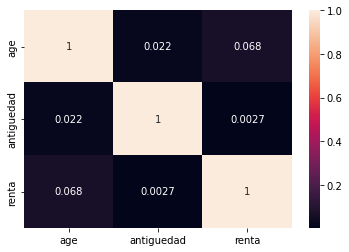

In [ ]:
sns.heatmap(train_df[num_columns].corr(), annot=True)
plt.show()

now we can replace the missing values feature **segmento** based on **renta**. 

In [ ]:
train_df.renta.groupby([train_df.segmento]).mean()

segmento
01 - TOP              173887.182284
02 - PARTICULARES     138889.796082
03 - UNIVERSITARIO    115673.619697
Name: renta, dtype: float64

In [ ]:
train_df[train_df.renta <= 115000].segmento.fillna("03 - UNIVERSITARIO", inplace=True)
train_df[train_df.renta <= 140000].segmento.fillna("02 - PARTICULARES", inplace=True)
train_df.segmento.fillna("01 - TOP", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


let's work with feature **sexo** 

In [ ]:
train_df.sexo.value_counts()

V    7424214
H    6195253
Name: sexo, dtype: int64

In [ ]:
train_df.sexo.fillna("V", inplace=True)

**indrel_1mes** and **tiprel_1mes**. There are 0.89% NA values. And types of data are different. We will not to make a ML models and for EDA analysis could be useful change values in a text format according to instructions

In [ ]:
train_df.indrel_1mes.value_counts()

1.0    7277589
1.0    4017733
1      2195321
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

In [ ]:
#Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)

map_indrel_1mes = {1: 'First/Primary', 
                   '1.0': 'First/Primary',
                   '1': 'First/Primary',
                   '3.0': 'Former primary',
                   3: 'Former primary',
                   '3': 'Former primary',
                   'P': 'Potential',
                   2: 'Co-owner', 
                   '2.0': 'Co-owner',
                   '2': 'Co-owner',
                   4: 'Former Co-owner', 
                   '4.0': 'Former Co-owner',
                   '4': 'Former Co-owner'}

In [ ]:
train_df.indrel_1mes = train_df.indrel_1mes.map(map_indrel_1mes)

In [ ]:
train_df.indrel_1mes.value_counts()

First/Primary      13490643
Former primary         4350
Co-owner               1317
Potential               874
Former Co-owner         306
Name: indrel_1mes, dtype: int64

In [ ]:
train_df.indrel_1mes.fillna('First/Primary', inplace=True)

In [ ]:
train_df.tiprel_1mes.value_counts()

I    7304875
A    6187085
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64

In [ ]:
# A (active), I (inactive), P (former customer),R (Potential)
#what is mean N?

map_tiprel_1mes = {'A': 'Active', 
                   'I': 'Inactive',
                   'P': 'Former customer',
                   'R': 'Potential'}

train_df.tiprel_1mes = train_df.tiprel_1mes.map(map_tiprel_1mes)
train_df.tiprel_1mes.fillna('I', inplace=True)

**canal_entrada**. Let's see which of channel the most popular in different province

In [ ]:
dict_best_chanels = {}
for i in train_df.nomprov.unique():
    dict_best_chanels[i] = train_df[train_df.nomprov == i].canal_entrada.value_counts().head(1).index.to_list()[0]

now we can replace the missing values by the most popular channel in each province  

In [ ]:
for key, value in dict_best_chanels.items():
      train_df.loc[(train_df.nomprov == key) & (train_df.canal_entrada.isnull() == True), 'canal_entrada'] = value

let's change date columns to date format

In [ ]:
train_df.fecha_dato = pd.to_datetime(train_df.fecha_dato, format="%Y-%m-%d")
train_df.fecha_alta = pd.to_datetime(train_df.fecha_alta, format="%Y-%m-%d")

In [ ]:
train_df.ind_nuevo.value_counts()

0.0    12808330
1.0      811207
Name: ind_nuevo, dtype: int64

indrel - 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month). No NA values. If you build an ML model, it could be better to change 99 on 0 because it is scaled for ML models.

In [ ]:
train_df.indrel.value_counts()

1.0     13594744
99.0       24793
Name: indrel, dtype: int64

In [ ]:
train_df.indresi.value_counts()

S    13553673
N       65864
Name: indresi, dtype: int64

In [ ]:
train_df.indext.value_counts()

N    12974801
S      644736
Name: indext, dtype: int64

In [ ]:
train_df.indfall.value_counts()

N    13584775
S       34762
Name: indfall, dtype: int64

In [ ]:
train_df.ind_actividad_cliente.value_counts()

0.0    7384373
1.0    6235164
Name: ind_actividad_cliente, dtype: int64

Other features describe the product and customer's product availability.


In [ ]:
train_df.ind_nomina_ult1.value_counts()

0.0    12873585
1.0      745735
Name: ind_nomina_ult1, dtype: int64

In [ ]:
train_df.ind_nom_pens_ult1.value_counts()

0.0    12809481
1.0      809839
Name: ind_nom_pens_ult1, dtype: int64

In [ ]:
train_df.ind_nom_pens_ult1.fillna(0, inplace=True)
train_df.ind_nomina_ult1.fillna(0, inplace=True)

In [ ]:
train_df.isnull().sum() / train_df.shape[0] *100

fecha_dato               0.0
ncodpers                 0.0
ind_empleado             0.0
pais_residencia          0.0
sexo                     0.0
age                      0.0
fecha_alta               0.0
ind_nuevo                0.0
antiguedad               0.0
indrel                   0.0
indrel_1mes              0.0
tiprel_1mes              0.0
indresi                  0.0
indext                   0.0
canal_entrada            0.0
indfall                  0.0
nomprov                  0.0
ind_actividad_cliente    0.0
renta                    0.0
segmento                 0.0
ind_ahor_fin_ult1        0.0
ind_aval_fin_ult1        0.0
ind_cco_fin_ult1         0.0
ind_cder_fin_ult1        0.0
ind_cno_fin_ult1         0.0
ind_ctju_fin_ult1        0.0
ind_ctma_fin_ult1        0.0
ind_ctop_fin_ult1        0.0
ind_ctpp_fin_ult1        0.0
ind_deco_fin_ult1        0.0
ind_deme_fin_ult1        0.0
ind_dela_fin_ult1        0.0
ind_ecue_fin_ult1        0.0
ind_fond_fin_ult1        0.0
ind_hip_fin_ul

let's save the clean data

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Glacier internship/Group_project/clean_data.csv', index=False, header=True)

Now we are ready to make EDA analysis. 